In [1]:
# y = b0 + b1x1 + b2x1^2 + ......+ bnx1^n

In [31]:
# when the graph is exponential sortoff or parobolic, linear models does not work good
# why its called polynomial "linear" regression ? b0 , b1 , b2...bn are unknowns so we are predicting those . hence linear refers to those coefficients




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Position_Salaries.csv")

In [4]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = data.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
Y = data.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [9]:
#Training the linear regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = lin_reg.predict(X)

In [11]:
# Polynomial Linear regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

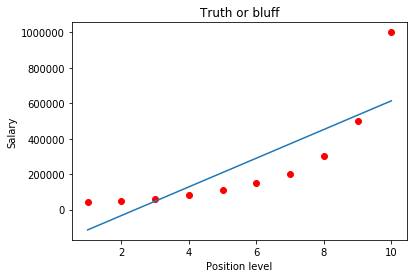

In [12]:
# Visualizing Regression results
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg.predict(X))
plt.title("Truth or bluff")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

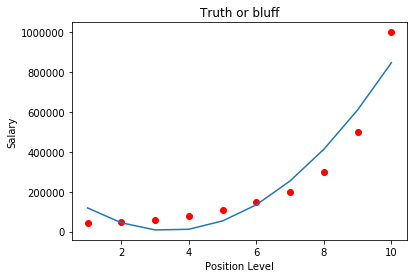

In [13]:
#Visualizing the polynomial result
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg_2.predict(X_poly))
plt.title("Truth or bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [14]:
#Polynomial regression with degree 4
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

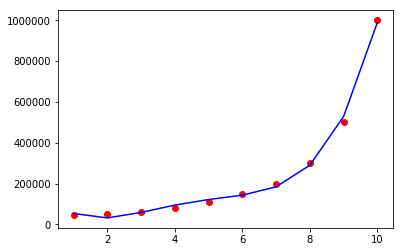

In [15]:
# Visualizing the result
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg_3.predict(X_poly1),color="blue")

In [16]:
# Predicting a new result with Linear regression
#lets predict the salary for a position of 6.5
# y = b0 + b1x1
lin_reg.predict(np.array([[6.5]])) # x1 =6.5

array([330378.78787879])

In [17]:
# predicting a new result with polynomial regression
# y = b0 + b1x1 + b2x2 + b3x3 + b4x4 
lin_reg_3.predict(poly_reg1.fit_transform([[6.5]])) # it will create an array with values x1, x1^2,x1^3,x1^4

array([158862.45265153])

In [18]:
# R2 value
y_predict = lin_reg_3.predict(X_poly1)

from sklearn import metrics 
r_square = metrics.r2_score(Y,y_predict)
r_square

0.9973922891706614

Best degree 9 with RMSE 0.106003152043532


Text(0, 0.5, 'RMSE')

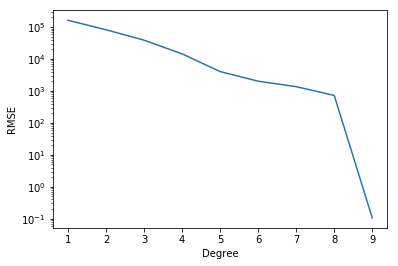

In [19]:
# predicting the degree for polynomial order selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rmses = []
min_rmse , min_deg = 1e10,0
degrees = np.arange(1,10)

for deg in degrees:
    #Train features
    poly_reg = PolynomialFeatures(degree=deg,include_bias=False)
    X_poly = poly_reg.fit_transform(X)
    
    #Linear regression
    regressor = LinearRegression()
    regressor.fit(X_poly,Y)
    
    #Compare with test data
    y_pred = regressor.predict(X_poly)
    poly_mse = mean_squared_error(Y,y_pred)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    #Cross validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot the results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
    